In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import glob
import os

In [50]:
resources_path = 'resources/'

year_files = glob.glob(os.path.join(resources_path + "year/", '*.csv'))
cpi_file = glob.glob(os.path.join(resources_path + "cpi/", '*.csv'))
all_file = glob.glob(os.path.join(resources_path, '*.csv'))
population_file = glob.glob(os.path.join(resources_path + "population/", '*.csv'))

year_data = pd.concat([pd.read_csv(file) for file in year_files], ignore_index=True)
cpi_data = pd.concat([pd.read_csv(file) for file in cpi_file], ignore_index=True)
all_data = pd.concat([pd.read_csv(file) for file in all_file], ignore_index=True)
population_data = pd.concat([pd.read_csv(file) for file in population_file], ignore_index=True)

all_data = all_data.groupby('회계연도')['지출금액(조원)'].sum().reset_index()

population_data = population_data.drop(population_data.index[0])
population_data = population_data[population_data['행정구역별(1)'] == '전국']
population_data = population_data.melt(id_vars=['행정구역별(1)'], var_name='연도', value_name='인구수')
population_data['연도'] = population_data['연도'].str.slice(0, 4).astype(int)
grouped = population_data.groupby('연도')['인구수'].apply(list).reset_index()

# Extract the first and second population values for each year
grouped['비율'] = grouped['인구수'].apply(lambda x: x[0] if len(x) > 0 else None).astype(float)
grouped['고령자 수'] = grouped['인구수'].apply(lambda x: x[1] if len(x) > 1 else None).astype(int)
population_data = pd.merge(population_data, grouped[['연도', '비율', '고령자 수']], on='연도', how='left')
population_data = population_data.drop_duplicates(subset='연도').sort_values(by='연도').reset_index(drop=True)

# Transpose the DataFrame and set the first row as the index
cpi_data = cpi_data.transpose()
cpi_data.columns = cpi_data.iloc[0]
cpi_data = cpi_data.drop(cpi_data.index[0]) # Drop the first row
cpi_data = cpi_data.reset_index()
cpi_data.columns = ['회계연도', '값']
cpi_data['회계연도'] = cpi_data['회계연도'].astype(int)

# cpi_data = cpi_data.set_index('회계연도')
cpi_data["값"] = cpi_data["값"] / 100

year_data = year_data[year_data['부문명'] == '노인']
year_data['국회확정금액(조원)'] = year_data['국회확정금액(천원)'].str.replace(',', '').astype(int) / 10_0000_0000
year_data = year_data.groupby('회계연도')['국회확정금액(조원)'].sum().reset_index()
year_data = pd.merge(year_data, cpi_data[['회계연도', '값']], on='회계연도')
year_data['실질국회확정금액(조원)'] = year_data['국회확정금액(조원)'] / year_data['값']

In [4]:
# Update this path to the location of your Hangul-supporting font
font_path = os.path.join('resources/font/D2Coding-Ver1.3.2-20180524-ligature.ttf')
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

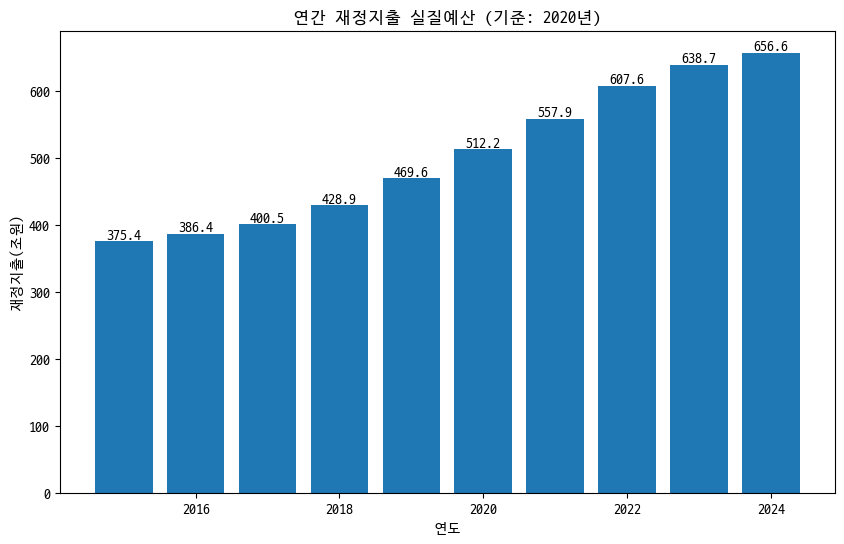

In [12]:
plt.figure(figsize=(10, 6))
years = all_data['회계연도']
spends = all_data['지출금액(조원)']
bars = plt.bar(years, spends)
plt.title('연간 재정지출 실질예산 (기준: 2020년)')
plt.xlabel('연도')
plt.ylabel('재정지출(조원)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

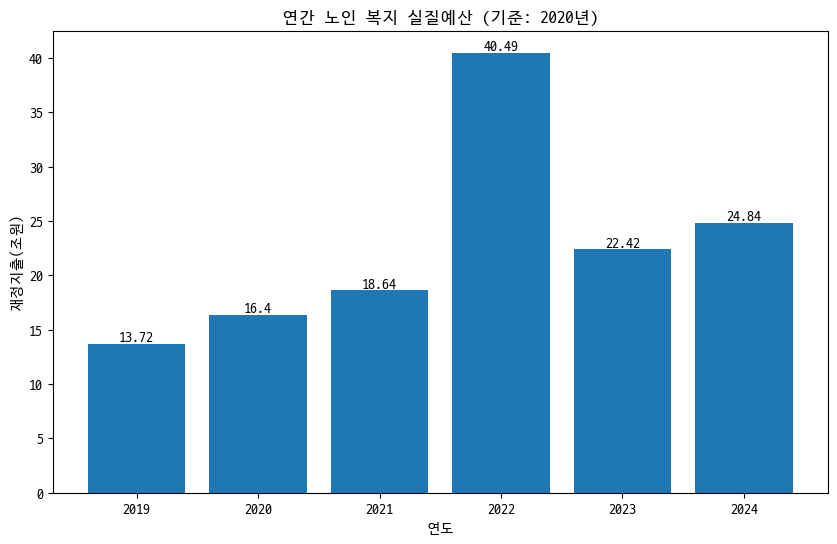

In [36]:
plt.figure(figsize=(10, 6))
years = year_data['회계연도']
values = year_data['국회확정금액(조원)']
bars = plt.bar(years, values)
plt.title('연간 노인 복지 실질예산 (기준: 2020년)')
plt.xlabel('연도')
plt.ylabel('재정지출(조원)')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

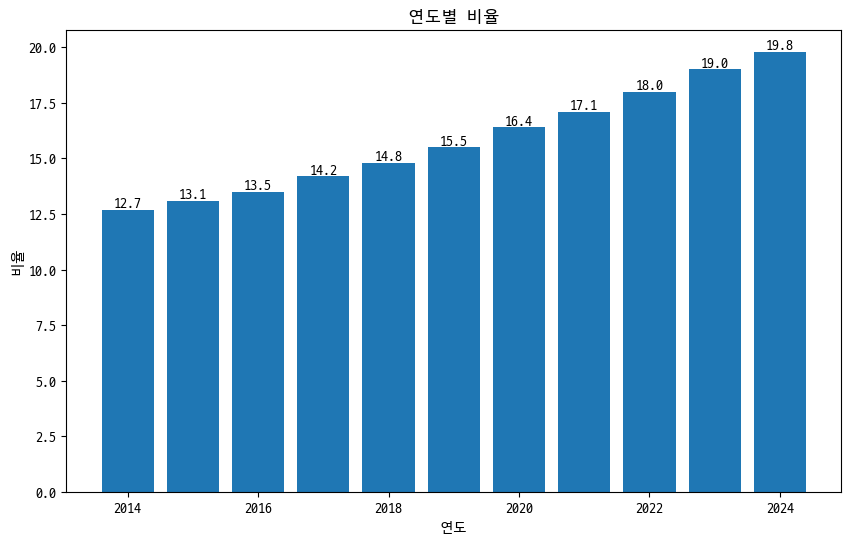

In [51]:
plt.figure(figsize=(10, 6))
years = population_data['연도']
proportions = population_data['비율']
populations = population_data['고령자 수']

bars = plt.bar(years, proportions)
plt.title('연도별 비율')
plt.xlabel('연도')
plt.ylabel('비율')

# Display values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

bars = plt.bar(years, populations)
plt.title('연간 노인인구 1인당 실질예산')
plt.xlabel('연도')
plt.ylabel('1인당 실질예산(조원/명)')

NameError: name 'index' is not defined

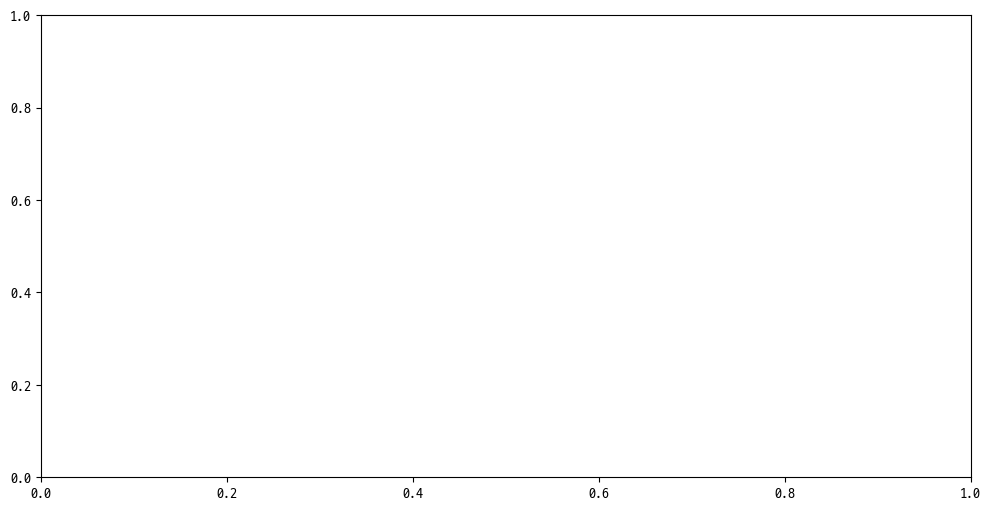

In [21]:
plt.figure(figsize=(10, 6))
years = population_data['연도']
proportions = population_data['비율']
bars = plt.bar(years, proportions)
plt.title('연도별 비율')
plt.xlabel('연도')
plt.ylabel('비율')

# Display values on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')
    
plt.show()